In [4]:
%pip install tslearn
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 8.6 MB/s eta 0:00:00


In [5]:
from tslearn.datasets import CachedDatasets
X_train, Y_train, X_test, Y_test = CachedDatasets().load_dataset("Trace")

In [47]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(100, 275, 1)
(100,)
(100, 275, 1)
(100,)


In [48]:
help(CachedDatasets)

Help on class CachedDatasets in module tslearn.datasets.cached:

class CachedDatasets(builtins.object)
 |  A convenience class to access cached time series datasets.
 |
 |  Note, that these *cached datasets* are statically included into *tslearn*
 |  and are distinct from the ones in :class:`UCR_UEA_datasets`.
 |
 |  When using the Trace dataset, please cite [1]_.
 |
 |  See Also
 |  --------
 |  UCR_UEA_datasets : Provides more datasets and supports caching.
 |
 |  References
 |  ----------
 |  .. [1] A. Bagnall, J. Lines, W. Vickers and E. Keogh, The UEA & UCR Time
 |     Series Classification Repository, www.timeseriesclassification.com
 |
 |  Methods defined here:
 |
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  list_datasets(self)
 |      List cached datasets.
 |
 |      Examples
 |      --------
 |      >>> from tslearn.datasets import UCR_UEA_datasets
 |      >>> _ = UCR_UEA_datasets().load_dataset("Trace")
 |      >>> cached = 

In [49]:
pd.DataFrame(X_train[:, :, 0]).describe()


,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.553302,-0.549062,-0.553799,-0.554638,-0.564682,-0.556676,-0.552250,-0.552436,-0.557392,-0.555775,...,0.668946,0.667223,0.664999,0.663779,0.660482,0.661107,0.659168,0.668042,0.660701,0.667295
std,1.168493,1.172267,1.171488,1.173499,1.165590,1.164495,1.169307,1.172918,1.172855,1.169764,...,0.093706,0.093930,0.093904,0.091849,0.086457,0.093778,0.095316,0.095242,0.089826,0.088983
min,-2.047400,-2.128700,-2.084400,-2.099800,-2.121600,-2.099200,-2.146200,-2.117200,-2.117900,-2.099800,...,0.488290,0.490530,0.485410,0.491200,0.510030,0.487090,0.484130,0.449020,0.444470,0.505400
25%,-1.646700,-1.651900,-1.609725,-1.635925,-1.624325,-1.616450,-1.616225,-1.627450,-1.654775,-1.651875,...,0.600702,0.587638,0.591557,0.596457,0.594187,0.582743,0.590947,0.598505,0.592820,0.592677
50%,-1.299000,-1.279050,-1.292950,-1.292300,-1.300600,-1.277100,-1.299350,-1.289750,-1.313850,-1.308250,...,0.648645,0.659275,0.660500,0.652890,0.649315,0.659410,0.648875,0.646185,0.655490,0.656225
75%,0.645900,0.627985,0.644050,0.641742,0.619903,0.624780,0.644162,0.641987,0.638722,0.641915,...,0.746252,0.754435,0.735530,0.732348,0.726193,0.728770,0.737867,0.734240,0.727840,0.730773
max,0.856610,0.854560,0.844600,0.834640,0.827580,0.820520,0.857280,0.824650,0.833140,0.807570,...,0.923420,0.872320,0.875440,0.906730,0.854900,0.857960,0.849630,0.902310,0.881040,0.872200


In [50]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

In [9]:
df = pd.DataFrame(X_train[:, :, 0])

In [10]:
display(df)

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,0.54407,0.65786,0.61124,0.54541,0.53216,0.59301,0.59528,0.53828,0.56343,0.59596,...,0.58823,0.57789,0.59807,0.58369,0.60288,0.55426,0.51415,0.60377,0.59633,0.58322
1,0.76643,0.62463,0.74225,0.66822,0.76612,0.73068,0.65511,0.72933,0.72365,0.70282,...,0.68619,0.68500,0.65401,0.68998,0.64181,0.67280,0.61673,0.72218,0.66786,0.72445
2,-2.04500,-2.09170,-2.07760,-2.03350,-1.99020,-2.05770,-2.01280,-2.05100,-2.05530,-2.07600,...,0.55547,0.52443,0.48541,0.55053,0.59755,0.60643,0.52293,0.52429,0.54742,0.57056
3,-1.70500,-1.73910,-1.72570,-1.80170,-1.74250,-1.76040,-1.69160,-1.68750,-1.76150,-1.77480,...,0.64928,0.64069,0.62599,0.61621,0.61688,0.65652,0.59599,0.60164,0.65616,0.58226
4,0.54137,0.57191,0.56215,0.52095,0.52749,0.60404,0.54052,0.58038,0.50058,0.59781,...,0.58600,0.62647,0.60962,0.55428,0.53947,0.53352,0.55775,0.50783,0.51377,0.52813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.60653,0.62571,0.63304,0.62139,0.60973,0.56836,0.61511,0.62784,0.61174,0.56173,...,0.57223,0.65894,0.55759,0.53845,0.54657,0.55469,0.56967,0.58465,0.63383,0.55859
96,0.74781,0.76297,0.73012,0.68065,0.77179,0.66561,0.73768,0.76279,0.72582,0.73755,...,0.75198,0.64260,0.78138,0.76449,0.74109,0.66191,0.68592,0.71661,0.67864,0.72428
97,-1.26570,-1.23810,-1.25690,-1.26400,-1.25400,-1.22490,-1.28120,-1.26190,-1.28450,-1.25290,...,0.92342,0.82926,0.87544,0.87019,0.82596,0.84466,0.84553,0.90231,0.87317,0.84577
98,0.67424,0.69950,0.72477,0.73695,0.67882,0.66796,0.66676,0.62970,0.61887,0.67119,...,0.63183,0.63022,0.64352,0.60495,0.61276,0.60509,0.59466,0.68093,0.61272,0.65020


<Axes: >

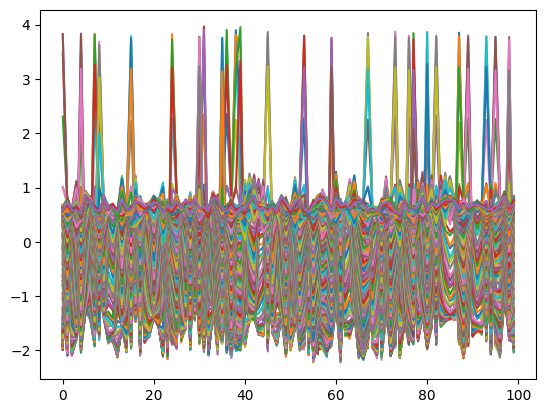

In [11]:
df.plot(legend=False)

In [51]:
X = X_train.reshape(X_train.shape[0], X_train.shape[1])
y = Y_train

mi = mutual_info_classif(X, y, discrete_features=False, random_state=42)
display("Mutual Information:", mi)

'Mutual Information:'

array([0.88144433, 0.87958653, 0.92613141, 0.90373617, 0.88761238,
       0.96869336, 0.93921017, 0.99392304, 0.94750296, 0.93326832,
       0.91112483, 0.92132383, 0.91994289, 0.93205955, 0.88379763,
       0.97536963, 1.01557035, 0.96364397, 0.91883636, 0.93018235,
       0.88669441, 0.98692388, 0.92021589, 0.98149231, 0.95993802,
       0.90643514, 0.94768119, 0.88627731, 0.87821107, 0.99233261,
       0.90863889, 0.95887983, 0.90055302, 0.99406277, 1.00439921,
       0.85257889, 0.85901591, 0.87894412, 0.92074965, 0.91625924,
       0.92001647, 0.96107258, 0.98377767, 0.95394195, 0.87910175,
       0.93094525, 0.95675883, 0.941713  , 0.89891147, 0.91813184,
       0.8967799 , 1.01260004, 0.82626072, 0.87105573, 0.78881971,
       0.60833099, 0.78180569, 0.77311516, 0.73318301, 0.76083159,
       0.68803203, 0.86494769, 0.7963295 , 0.81283359, 0.73361279,
       0.73837607, 0.64177819, 0.72395685, 0.70360299, 0.72775751,
       0.65879715, 0.8413641 , 0.79984376, 0.79991488, 0.73399

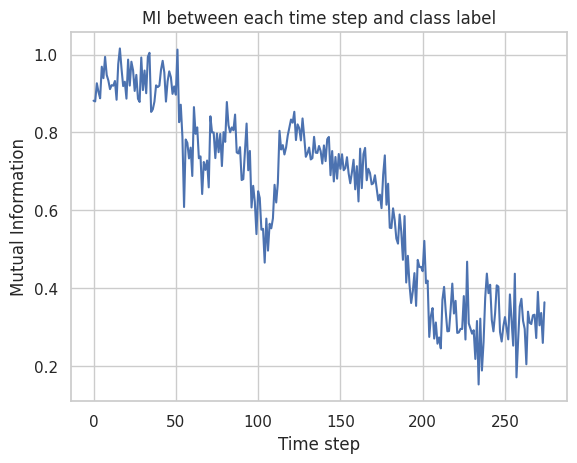

In [53]:
plt.plot(mi)
plt.xlabel("Time step")
plt.ylabel("Mutual Information")
plt.title("MI between each time step and class label")
plt.show()


In [58]:
min_mi_indices = np.argsort(mi)[:10]
print("Time steps with the 10 minimum mutual information scores:", min_mi_indices)

max_mi_indices = np.argsort(mi)[-10:]
print("Time steps with the 10 maximum mutual information scores:", max_mi_indices)


Time steps with the 10 minimum mutual information scores: [234 257 236 263 232 211 255 209 273 237]
Time steps with the 10 maximum mutual information scores: [15 23 42 21 29  7 33 34 51 16]


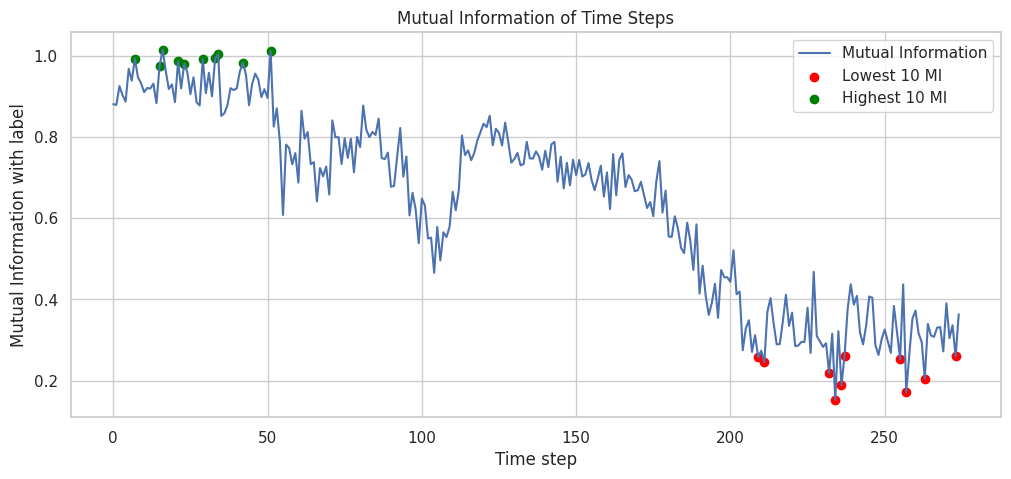

In [57]:
plt.figure(figsize=(12,5))
plt.plot(mi, label='Mutual Information')
plt.scatter(min_mi_indices, mi[min_mi_indices], color='red', label='Lowest 10 MI')
plt.scatter(max_mi_indices, mi[max_mi_indices], color='green', label='Highest 10 MI')
plt.xlabel("Time step")
plt.ylabel("Mutual Information with label")
plt.title("Mutual Information of Time Steps")
plt.legend()
plt.show()

Removing “low MI” steps doesn’t mean they are completely useless, because patterns across multiple steps could still be important.

In [17]:
print(set(y))

{np.int64(1), np.int64(2), np.int64(3), np.int64(4)}


''

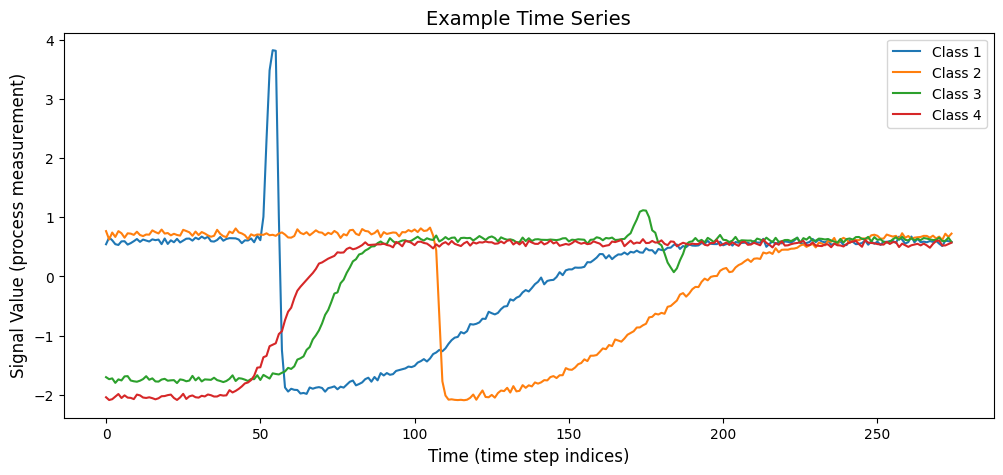

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
for i in range(1, 5):
    plt.plot(X_train[Y_train == i][0].ravel(), label=f'Class {i}')
plt.title("Example Time Series", fontsize=14)
plt.xlabel("Time (time step indices)", fontsize=12)
plt.ylabel("Signal Value (process measurement)", fontsize=12)
plt.legend()
;

**General suggestion for supervised learning

The dataset is well-separated, meaning that different classes have distinct temporal signatures.
This makes it suitable for classification — algorithms can learn those shapes.

We must use time-aware models (like DTW-based k-NN, 1D CNNs, or RNN/LSTM) rather than treating the data as unordered vectors.

Normalization (e.g., z-scaling per series) is important to prevent models from being biased by magnitude rather than shape.

Smoothing or feature extraction (like using wavelets, derivatives, or symbolic representations) may help improve classification.

Let's start from identifing class paterns

In [19]:
print("Classes and counts:", {c: int(np.sum(Y_train==c)) for c in np.unique(Y_train)})
X2 = X_train.reshape(X_train.shape[0], X_train.shape[1])  # shape: (100, 275)


Classes and counts: {np.int64(1): 26, np.int64(2): 21, np.int64(3): 22, np.int64(4): 31}


''

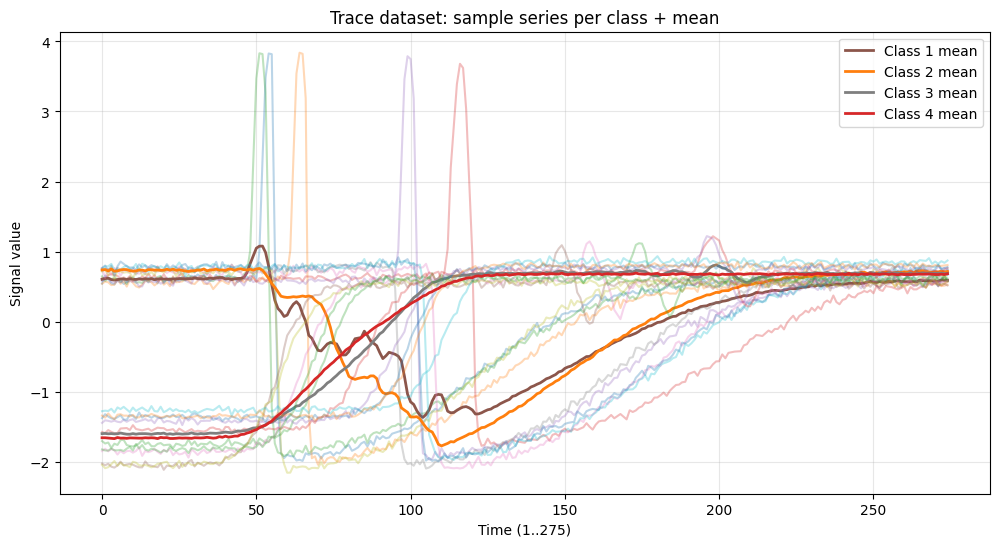

In [21]:
classes = np.unique(Y_train)
plt.figure(figsize=(12, 6))

for cls in classes:
    idx = np.where(Y_train == cls)[0]
    for i in idx[:5]:
        plt.plot(X2[i], alpha=0.3)
    plt.plot(X2[idx].mean(axis=0), linewidth=2, label=f'Class {cls} mean')

plt.xlabel("Time (1..275)")
plt.ylabel("Signal value")
plt.title("Trace dataset: sample series per class + mean")
plt.legend()
plt.grid(alpha=0.3)
;

''

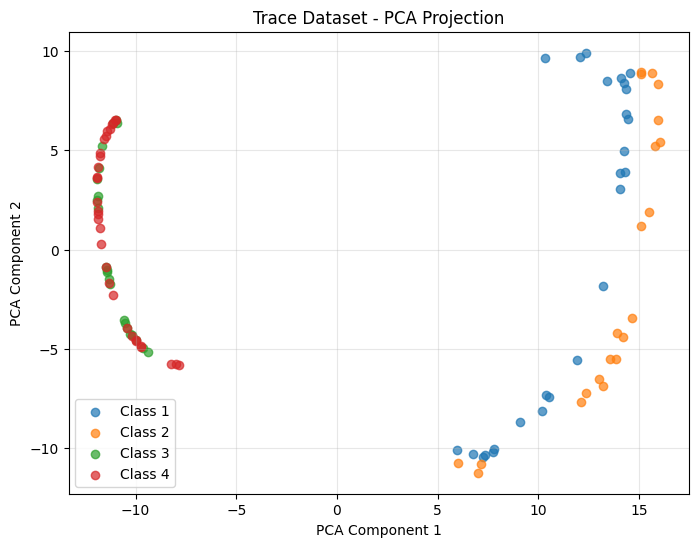

In [22]:
from sklearn.decomposition import PCA

X2 = X_train.reshape(X_train.shape[0], X_train.shape[1])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X2)

plt.figure(figsize=(8,6))
for cls in np.unique(Y_train):
    plt.scatter(X_pca[Y_train==cls, 0], X_pca[Y_train==cls, 1], label=f"Class {cls}", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Trace Dataset - PCA Projection")
plt.legend()
plt.grid(alpha=0.3)
;

**PCA will ignore temporal order. Also we can see that Class 3 and Class 4 not sepaerable in 2D PCA space.**

**Let's verify that the order of time steps matters.**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X2 = X_train.reshape(X_train.shape[0], X_train.shape[1])

knn = KNeighborsClassifier(n_neighbors=3)
scores_orig = cross_val_score(knn, X2, Y_train, cv=5)
print("Baseline accuracy (original order):", scores_orig.mean())

rng = np.random.default_rng(42)
X_shuffled = np.array([rng.permutation(x) for x in X2])

scores_shuff = cross_val_score(knn, X_shuffled, Y_train, cv=5)
print("Accuracy after shuffling time steps:", scores_shuff.mean())


Baseline accuracy (original order): 0.7100000000000001
Accuracy after shuffling time steps: 0.29


**We can say that the order is critical and this result clearly shows the importance of temporal structure.**

**(optional)  For supervised learning we need time-aware methods , such as:**

*   DTW-based k-NN
*   1D CNNs
*   RNN/LSTM or GRU
*   Temporal feature extraction

**Let's do normalization.**

In [24]:
from sklearn.preprocessing import StandardScaler

X2 = X_train.reshape(X_train.shape[0], X_train.shape[1])
X2_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

scaler = StandardScaler()

X_norm = np.array([scaler.fit_transform(x.reshape(-1,1)).ravel() for x in X2])
X_test_norm = np.array([scaler.fit_transform(x.reshape(-1,1)).ravel() for x in X2_test])


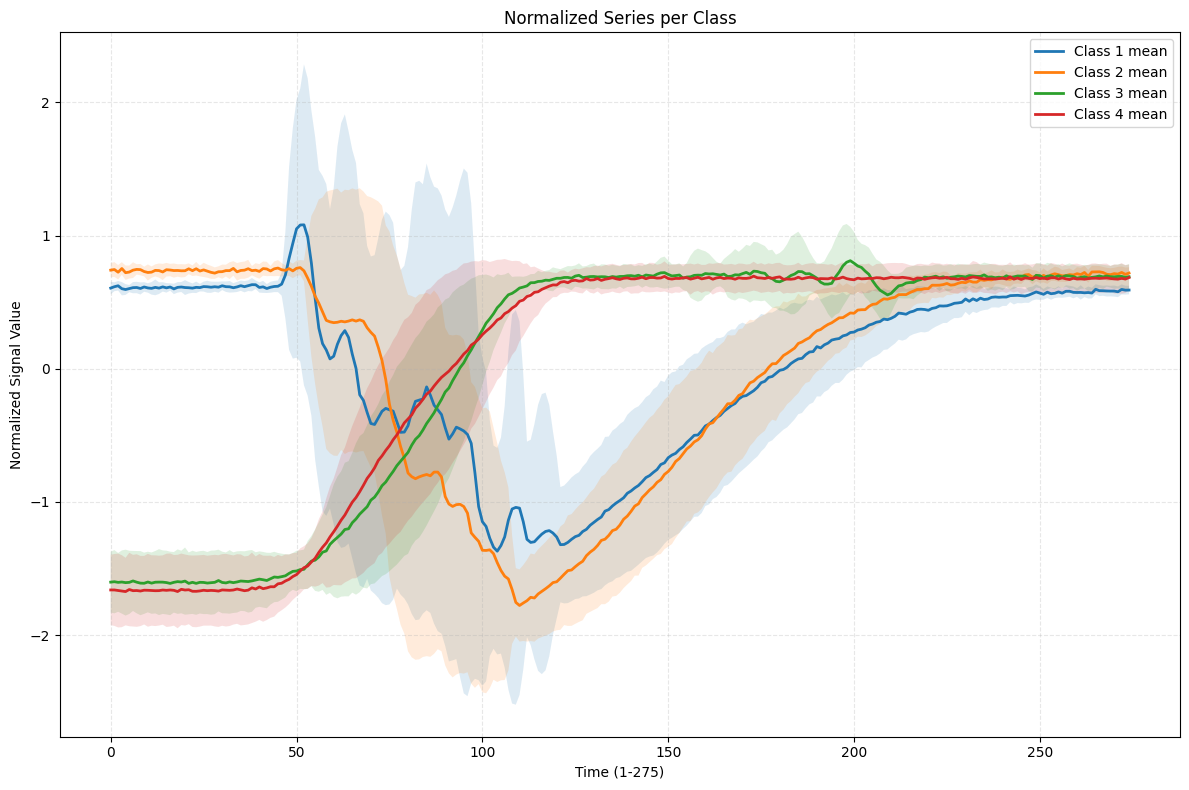

In [25]:
classes = np.unique(Y_train)

plt.figure(figsize=(12, 8))

for cls in classes:
    idx = np.where(Y_train == cls)[0]
    mean_series = X_norm[idx].mean(axis=0)
    std_series = X_norm[idx].std(axis=0)

    plt.plot(mean_series, linewidth=2, label=f"Class {cls} mean")
    plt.fill_between(np.arange(X_norm.shape[1]),
                     mean_series - std_series,
                     mean_series + std_series,
                     alpha=0.15)

plt.title("Normalized Series per Class")
plt.xlabel("Time (1-275)")
plt.ylabel("Normalized Signal Value")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

**(Optional, just an example) DTW-based k-NN** (Supervised learning)

In [59]:
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

X_train_3d = X_norm[..., np.newaxis]
X_test_3d = X_test_norm[..., np.newaxis]

scaler = TimeSeriesScalerMeanVariance()
X_train_scaled = scaler.fit_transform(X_train_3d)
X_test_scaled = scaler.transform(X_test_3d)

knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train_scaled, Y_train)

accuracy = knn_dtw.score(X_test_scaled, Y_test)
print(f"DTW-kNN test accuracy: {accuracy}")


DTW-kNN test accuracy: 1.0


**Dinamic time warping k_NN is extrimly effective on this DataSet**

**Clustering**

''

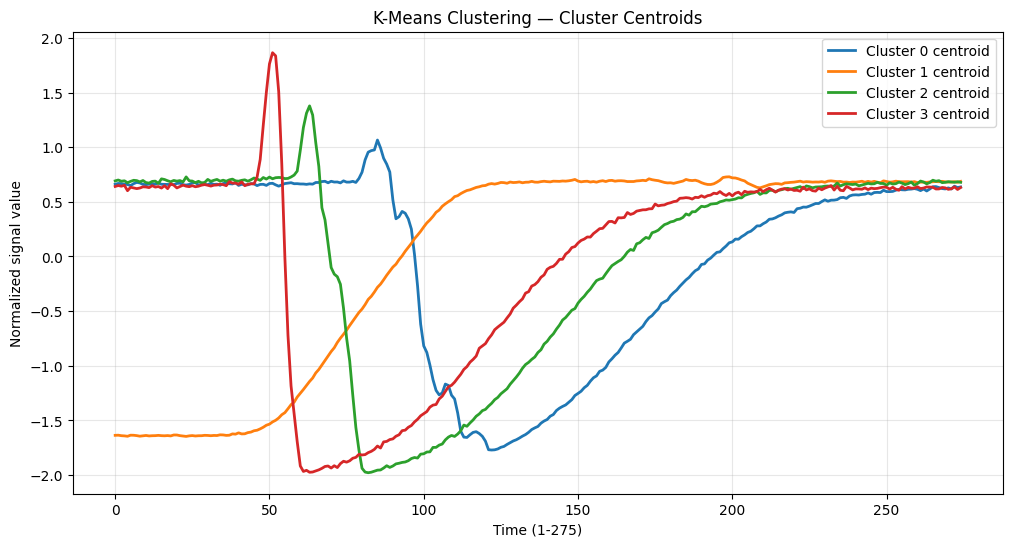

In [27]:
from sklearn.cluster import KMeans

n_clusters = 4  # we know there are 4 classes, but clustering is unsupervised

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_norm)

centroids = kmeans.cluster_centers_

plt.figure(figsize=(12,6))
for i in range(n_clusters):
    plt.plot(centroids[i], label=f"Cluster {i} centroid", linewidth=2)

plt.title("K-Means Clustering — Cluster Centroids")
plt.xlabel("Time (1-275)")
plt.ylabel("Normalized signal value")
plt.legend()
plt.grid(alpha=0.3)
;

Visualization of individual series colored by cluster ⚫

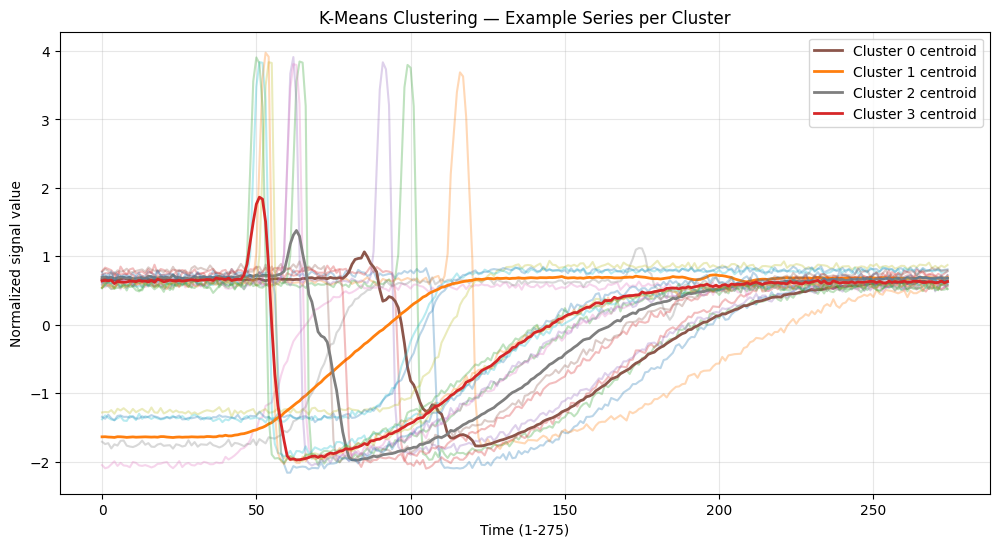

In [28]:
plt.figure(figsize=(12,6))
for i in range(n_clusters):
    idx = np.where(cluster_labels == i)[0]
    for j in idx[:5]:
        plt.plot(X_norm[j], alpha=0.3)
    plt.plot(centroids[i], linewidth=2, label=f"Cluster {i} centroid")

plt.title("K-Means Clustering — Example Series per Cluster")
plt.xlabel("Time (1-275)")
plt.ylabel("Normalized signal value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


**Compairing with true labeles**

In [29]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("Silhouette score:", silhouette_score(X_norm, cluster_labels))

ari = adjusted_rand_score(Y_train, cluster_labels)
print(f"Adjusted rand score: {ari}")


Silhouette score: 0.5567525775320623
Adjusted rand score: 0.42807004097144014


Silhouette Score: 0.557 → clusters are moderately well-separated.

Adjusted Rand Index (ARI): 0.428 → partial alignment with true labels.

**This is expected: Euclidean distance ignores temporal alignment.**

**A time-aware distance like DTW is likely to produce better, more meaningful clusters.**

/tmp/ipython-input-3686008027.py:9: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dtw_dist, method='average')


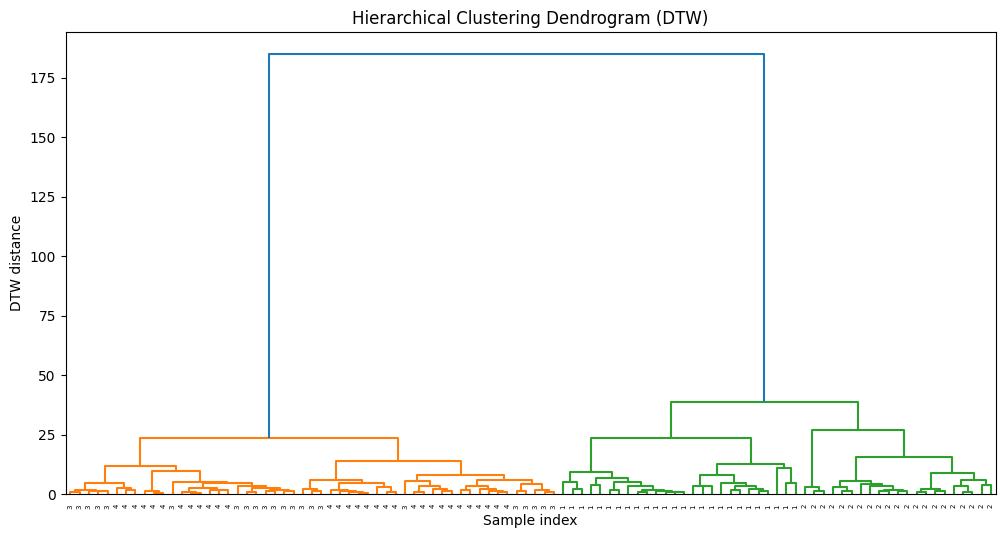

In [30]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from tslearn.metrics import cdist_dtw


n_samples = X_norm.shape[0]

dtw_dist = cdist_dtw(X_norm)

Z = linkage(dtw_dist, method='average')

n_clusters = 4
cluster_labels_dtw = fcluster(Z, t=n_clusters, criterion='maxclust') - 1

plt.figure(figsize=(12,6))
dendrogram(Z, color_threshold=None, labels=Y_train)
plt.title("Hierarchical Clustering Dendrogram (DTW)")
plt.xlabel("Sample index")
plt.ylabel("DTW distance")
plt.show()


In [31]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("Silhouette score:", silhouette_score(X_norm, cluster_labels_dtw))
ari_dtw = adjusted_rand_score(Y_train, cluster_labels_dtw)
print(f"Hierarchical DTW ARI: {ari_dtw:.3f}")


Silhouette score: 0.367412075130872
Hierarchical DTW ARI: 0.660


** The same with sklearn **

In [32]:
from sklearn.cluster import AgglomerativeClustering
from tslearn.metrics import cdist_dtw
import matplotlib.pyplot as plt

dtw_dist = cdist_dtw(X_norm)

hier_skl = AgglomerativeClustering(n_clusters=4, metric='precomputed', linkage='average')
cluster_labels_dtw = hier_skl.fit_predict(dtw_dist)

from sklearn.metrics import adjusted_rand_score, silhouette_score

ari_dtw = adjusted_rand_score(Y_train, cluster_labels_dtw)
print("Silhouette score:", silhouette_score(X_norm, cluster_labels_dtw))
print(f"Hierarchical DTW ARI (sklearn): {ari_dtw:.3f}")

Silhouette score: 0.26576465021383716
Hierarchical DTW ARI (sklearn): 0.659


Silhouette scores differ between implementations because they use Euclidean distances, whereas clustering was performed with DTW; ARI confirms the clusters’ agreement with true labels.

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/

<Figure size 1600x600 with 0 Axes>

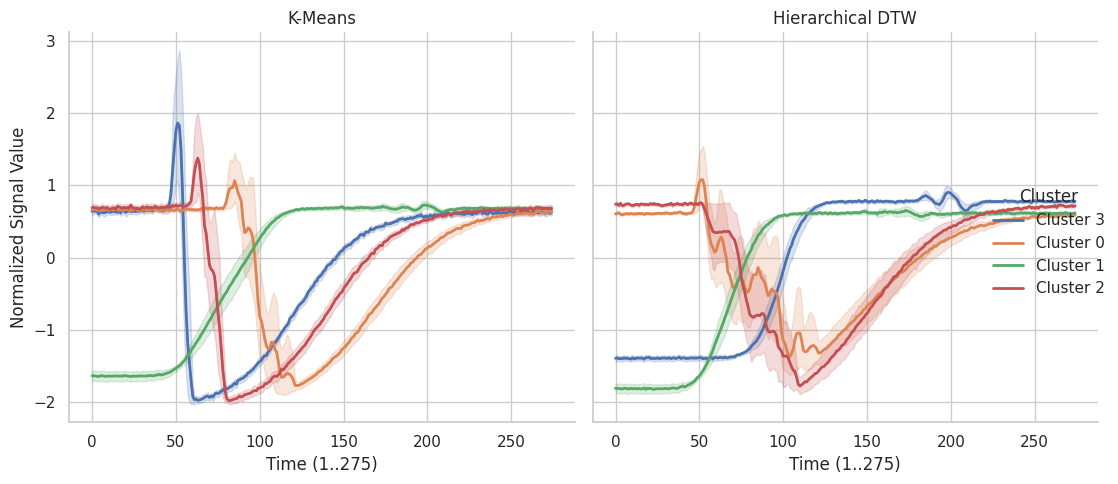

In [36]:
def prepare_df(X, cluster_labels, method_name):
    n_samples, n_timestamps = X.shape
    df_list = []
    for i in range(n_samples):
        df_list.append(pd.DataFrame({
            "Time": np.arange(n_timestamps),
            "Value": X[i],
            "Cluster": f"Cluster {cluster_labels[i]}",
            "Method": method_name
        }))
    return pd.concat(df_list, axis=0)

df_kmeans = prepare_df(X_norm, cluster_labels, "K-Means")
df_dtw = prepare_df(X_norm, cluster_labels_dtw, "Hierarchical DTW")

df_all = pd.concat([df_kmeans, df_dtw], axis=0)

plt.figure(figsize=(16,6))
sns.set(style="whitegrid")

g = sns.FacetGrid(df_all, col="Method", hue="Cluster", col_order=["K-Means","Hierarchical DTW"], height=5, aspect=1)
g.map_dataframe(sns.lineplot, x="Time", y="Value", alpha=0.3)
g.map_dataframe(sns.lineplot, x="Time", y="Value", estimator="mean", ci=None, linewidth=2)
g.add_legend()
g.set_axis_labels("Time (1..275)", "Normalized Signal Value")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


In [37]:
def prepare_df(X, labels, method_name):
    n_samples, n_timestamps = X.shape
    df_list = []
    for i in range(n_samples):
        df_list.append(pd.DataFrame({
            "Time": np.arange(n_timestamps),
            "Value": X[i],
            "Group": f"{labels[i]}",
            "Method": method_name
        }))
    return pd.concat(df_list, axis=0)

df_kmeans = prepare_df(X_norm, cluster_labels, "K-Means Cluster")
df_dtw = prepare_df(X_norm, cluster_labels_dtw, "Hierarchical DTW")
df_true = prepare_df(X_norm, Y_train, "True Labels")

df_all = pd.concat([df_kmeans, df_dtw, df_true], axis=0)

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


<Figure size 1800x600 with 0 Axes>

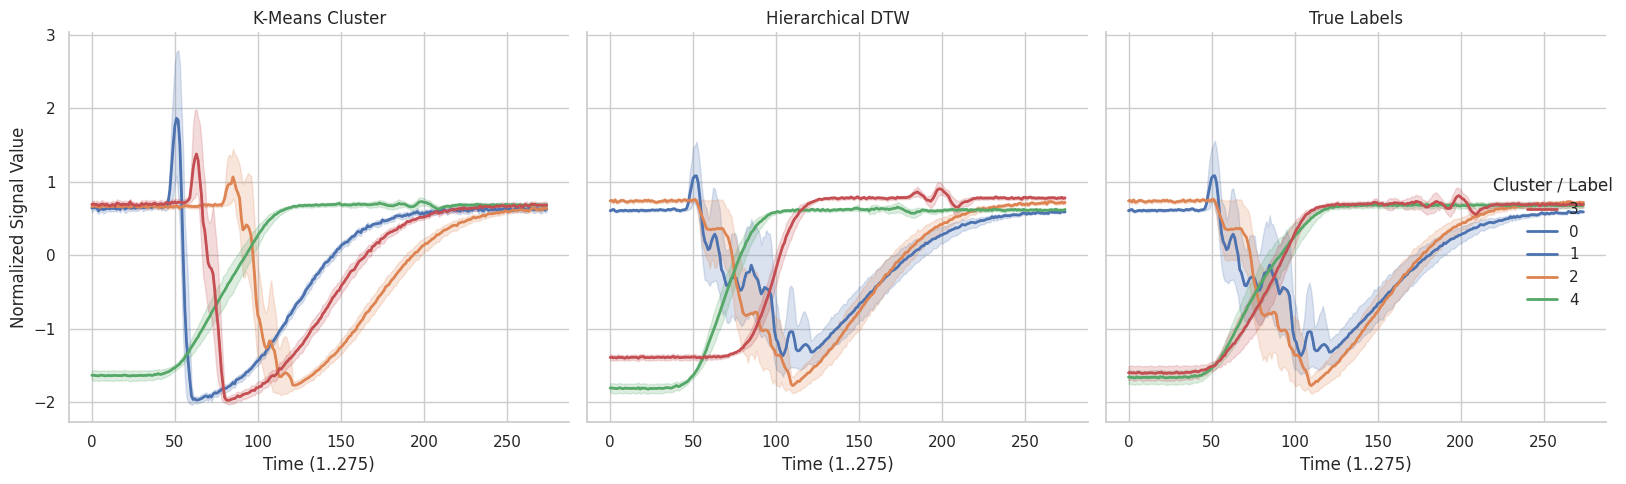

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,6))

g = sns.FacetGrid(df_all, col="Method", col_order=["K-Means Cluster","Hierarchical DTW","True Labels"], height=5, aspect=1)
g.map_dataframe(sns.lineplot, x="Time", y="Value", hue="Group", alpha=0.3, legend=None)
g.map_dataframe(sns.lineplot, x="Time", y="Value", hue="Group", estimator="mean", ci=None, linewidth=2)
g.set_axis_labels("Time (1..275)", "Normalized Signal Value")
g.set_titles("{col_name}")
g.add_legend(title="Cluster / Label")
plt.tight_layout()
plt.show()


**Conclusion**

K-Means:

* Partially separates series but struggles with temporal misalignment.

* ARI: 0.428 → moderate alignment with true labels.

Hierarchical DTW:

* Preserves temporal patterns and aligns shifted series.

* ARI: 0.660 → much better agreement with true classes.

Takeaway:

* Time-aware distance metrics (DTW) are superior for clustering time series
* where shape matters more than absolute values.

K-Means can be used for rough grouping but is limited by Euclidean distance.

************************Additional part

----------------------------------------------------------------------------------------------------------------------------------------------------------------


                           **Let's use K-Shape Clustering**



Often gives higher ARI and cleaner cluster centroids than DTW or K-Means

In [40]:
from tslearn.clustering import KShape
from sklearn.metrics import adjusted_rand_score, silhouette_score

kshape = KShape(n_clusters=4, n_init=3, random_state=0)
kshape_labels = kshape.fit_predict(X_norm)

ari_kshape = adjusted_rand_score(Y_train, kshape_labels)
sil_kshape = silhouette_score(X_norm, kshape_labels)
print(f"K-Shape            → ARI: {ari_kshape:.3f}, Silhouette: {sil_kshape:.3f}")

K-Shape            → ARI: 0.375, Silhouette: 0.431


The score is lower that We expected. So let's make some changes and work with parameters.

In [41]:
X_train, Y_train, X_test, Y_test = CachedDatasets().load_dataset("Trace")

scaler = TimeSeriesScalerMeanVariance()
X_norm = scaler.fit_transform(X_train).squeeze()

np.random.seed(42)

kshape = KShape(n_clusters=4, n_init=5, verbose=True, random_state=42)
kshape_labels = kshape.fit_predict(X_norm)

ari_kshape = adjusted_rand_score(Y_train, kshape_labels)
silhouette_kshape = silhouette_score(X_norm, kshape_labels)

print(f"K-Shape ARI: {ari_kshape:.3f}")
print(f"K-Shape Silhouette: {silhouette_kshape:.3f}")


Init 1
0.018 --> 0.017 --> 0.017 --> 0.017 --> 0.017 --> 0.017 --> 0.017 --> 0.017 --> 0.017 --> 0.017 --> 
Init 2
0.002 --> 0.002 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 
Init 3
Resumed because of empty cluster
Init 3
0.001 --> 0.001 --> 
Init 4
0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 
Init 5
0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 0.001 --> 
K-Shape ARI: 0.629
K-Shape Silhouette: 0.299


Method---------------------Distance Metric----------------------ARI__Silhouette

* K-Means--------------------Euclidean------------------------------0.43__0.56
* K-Shape--------------------Shape-based (phase-invariant)----------0.63__0.30
* Hierarchical (DTW)---------Dynamic Time Warping-------------------0.66__0.37

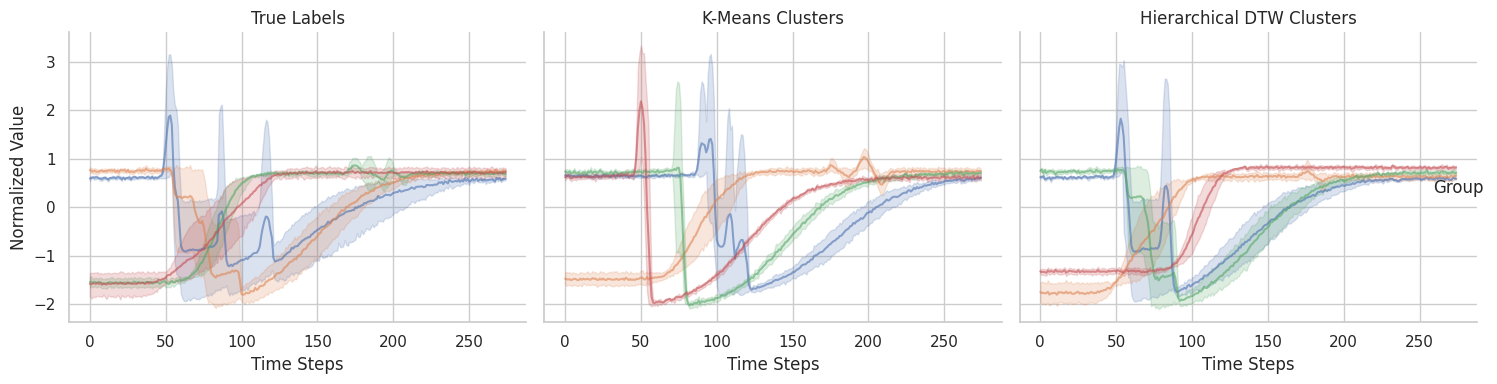

In [45]:
def sample_indices_per_group(labels, n_samples=5):
    indices = []
    for label in np.unique(labels):
        group_indices = np.where(labels == label)[0]
        selected = np.random.choice(group_indices, size=min(n_samples, len(group_indices)), replace=False)
        indices.extend(selected)
    return indices

def prepare_df_for_plotting(X, labels, method_name, sampled_indices):
    n_timestamps = X.shape[1]
    df_list = []
    for i in sampled_indices:
        df_list.append(pd.DataFrame({
            "Time": np.arange(n_timestamps),
            "Value": X[i],
            "Group": f"{labels[i]}",
            "Method": method_name
        }))
    return pd.concat(df_list, axis=0)

sampled_idx_true = sample_indices_per_group(Y_train)
sampled_idx_kmeans = sample_indices_per_group(cluster_labels)
sampled_idx_dtw = sample_indices_per_group(cluster_labels_dtw)

df_true_plot = prepare_df_for_plotting(X_norm, Y_train, "True Labels", sampled_idx_true)
df_kmeans_plot = prepare_df_for_plotting(X_norm, cluster_labels, "K-Means Clusters", sampled_idx_kmeans)
df_dtw_plot = prepare_df_for_plotting(X_norm, cluster_labels_dtw, "Hierarchical DTW Clusters", sampled_idx_dtw)

df_all_plot = pd.concat([df_true_plot, df_kmeans_plot, df_dtw_plot], axis=0)

sns.set(style="whitegrid")
g = sns.FacetGrid(df_all_plot, col="Method", col_order=["True Labels", "K-Means Clusters", "Hierarchical DTW Clusters"], height=4, aspect=1.2)
g.map_dataframe(sns.lineplot, x="Time", y="Value", hue="Group", alpha=0.6, legend=None)

g.add_legend(title="Group")
g.set_axis_labels("Time Steps", "Normalized Value")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

Among the tested methods, Hierarchical clustering with DTW achieved the highest ARI (0.66), indicating the best alignment with true labels.
K-Shape also performed well (ARI 0.63), confirming its strength in capturing shape similarities.
K-Means, which uses Euclidean distance, struggled because it cannot account for time distortions typical in time series.
Overall, time-aware methods (DTW, K-Shape) outperform standard distance-based approaches, proving the importance of temporal alignment in time series clustering.

Let's see how **Agglomerative** Clusterin will preform here, because it's good for small dataseets and it provides hierarcical view of clusters.


Hierarchical Clustering ARI: 0.428
Hierarchical Clustering Silhouette: 0.557


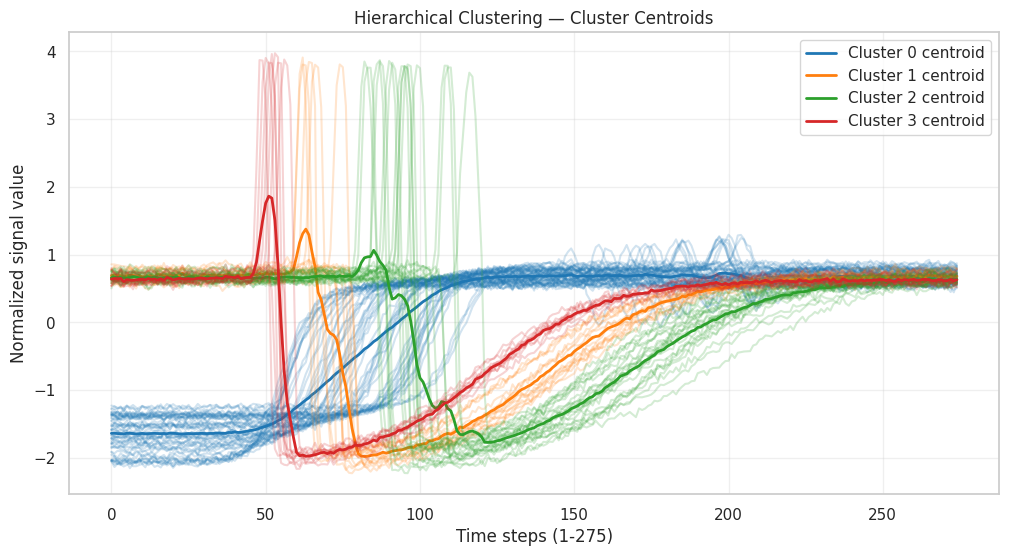

In [66]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 4
hier = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
cluster_labels_hier = hier.fit_predict(X_norm)

ari_hier = adjusted_rand_score(Y_train, cluster_labels_hier)
silhouette_hier = silhouette_score(X_norm, cluster_labels_hier)
print(f"Hierarchical Clustering ARI: {ari_hier:.3f}")
print(f"Hierarchical Clustering Silhouette: {silhouette_hier:.3f}")

centroids_hier = np.array([X_norm[cluster_labels_hier == i].mean(axis=0) for i in range(n_clusters)])
plt.figure(figsize=(12,6))
colors = ['tab:blue','tab:orange','tab:green','tab:red']

for i in range(n_clusters):
    for x in X_norm[cluster_labels_hier == i]:
        plt.plot(x, color=colors[i], alpha=0.2)
    plt.plot(centroids_hier[i], color=colors[i], linewidth=2, label=f"Cluster {i} centroid")

plt.title("Hierarchical Clustering — Cluster Centroids")
plt.xlabel("Time steps (1-275)")
plt.ylabel("Normalized signal value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

ARI = 0.428 → Moderate agreement with true labels; the clusters do not perfectly match the known classes.

Silhouette = 0.557 → Clusters are fairly compact and well-separated in feature space.